# Analizing one run of the EA

# Preliminaries
## Importing packages

In [23]:
import numpy as np

%matplotlib inline

import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')

from thesis_EAfunc import *
from thesis_visfunc import *

# Define landscape

In [24]:
#Problem domain
x_min = -2.5
x_max = 2.5
y_min = -2.5
y_max = 2.5

domain = (x_min, x_max, y_min, y_max)

#Problem definition
def f(x, y):
    D = 2
    alpha = 1/8
    a = np.abs(x ** 2 + y ** 2 - D) ** (alpha * D)
    b = ( 0.5 * (x ** 2 + y ** 2) + (x + y) ) / D
        
    return (a + b + 0.5)

#Testing the minimum
f(-1,-1)

0.0

# Running the Evolutionary Algorithm
## Setting the EA's parameters

In [25]:
#starting seed
np.random.seed(654321)

In [25]:
#Algorithm parameters
## Number of experiments, and generations per experiment
exp_n = 1
gen_f = 40

## Population size
pop_s = 12

## Parent subpopulation's selection method and size
par_selection = 'Ranking'
par_s = 6

## Progeny subpopulation's and size
prog_s = 6
### Crossover Method
crossover = 'None'
### Mutation method, probability and size
mutation = 'random_co_dis'
mut_p = 0.5
mut_s = 0.5

## New population selection method
population_new='Ranking'

## We run the EA for 1 generation

run_n = 0
birthcounter = 0

population, generations, birthcounter, gen_n = EA_start(pop_s, domain, f, birthcounter)

for i in range(gen_f):
    birthcounter, progeny = EA_prog(population, par_s, prog_s, birthcounter, gen_n, mut_p, mut_s, domain, f, par_selection, crossover, mutation)
    generations = EA_prog_to_df(generations, progeny)
    gen_n, population, progeny = EA_new_population(population, progeny, gen_n, pop_s, f, population_new)
    generations = EA_pop_to_df(generations, population)

fitness = EA_fitn_summary(generations)

In [26]:
genera_res, fitness_res = EA_exp(exp_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, population_new)

In [27]:
query = (genera_res['generation']==32)
genera_res[query]

,run,generation,birthdate,function,fitness,gen_x,gen_y
540,0.0,30.0,34.0,population,0.834778,-1.111593,-1.365743
541,0.0,30.0,99.0,population,0.834778,-1.111593,-1.365743
542,0.0,30.0,90.0,population,0.834778,-1.111593,-1.365743
543,0.0,30.0,100.0,population,0.834778,-1.111593,-1.365743
544,0.0,30.0,73.0,population,0.834778,-1.111593,-1.365743
545,0.0,30.0,36.0,population,0.834778,-1.111593,-1.365743
546,0.0,30.0,84.0,population,0.834778,-1.111593,-1.365743
547,0.0,30.0,109.0,population,0.834778,-1.111593,-1.365743
548,0.0,30.0,102.0,population,0.943806,-1.171564,-1.365743
549,0.0,30.0,68.0,population,0.963791,-1.184016,-1.365743


# Visualization
## Fitness development

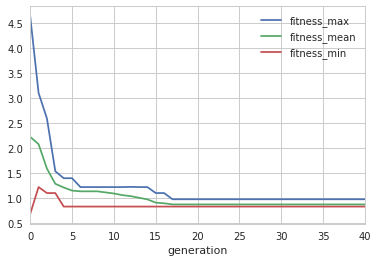

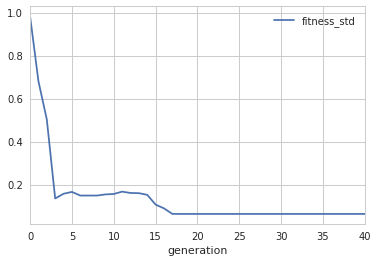

In [28]:
EA_fitn_dev(fitness_res, 0)

## Visualizing Landscape

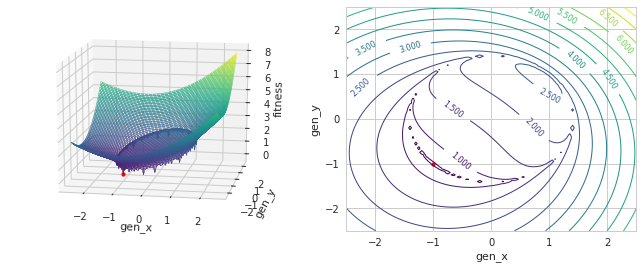

In [29]:
EA_plt_land(f, domain, 101, a=15, b=-80)

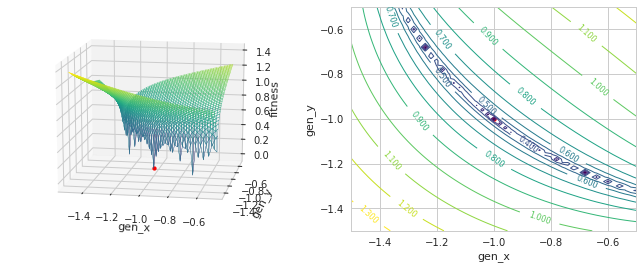

In [30]:
domain_min=(-1.5,-.5,-1.5,-0.5)
EA_plt_land(f, domain_min, 51, a=15, b=-80)

## Visualizing initial population and its progeny

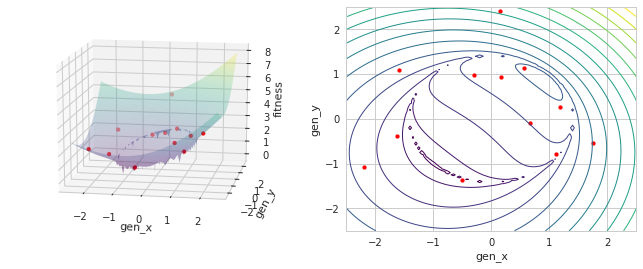

In [31]:
steps=101  #Graphing resolution parameter
run_s=0  #First (and only) run
gen_s=0  #First generation
EA_plt_pop(f, domain, steps, genera_res, run_s, gen_s, a=15, b=-80)

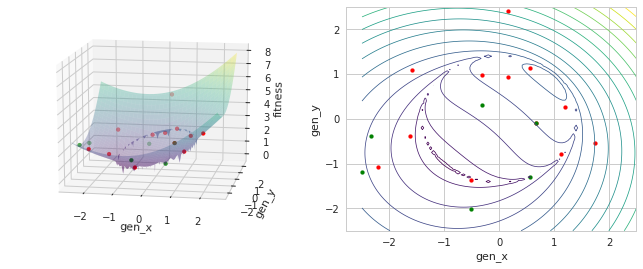

In [32]:
EA_plt_gen(f, domain, steps, genera_res, run_s, gen_s, a=15, b=-80)

## Checking movement of population

Generation 0


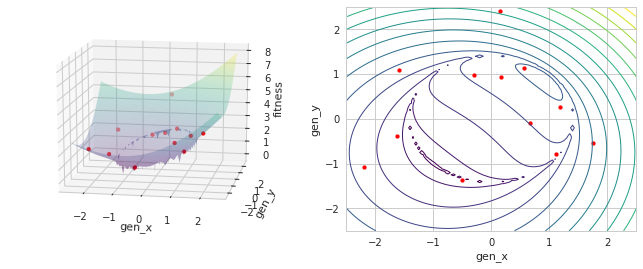

Generation 4


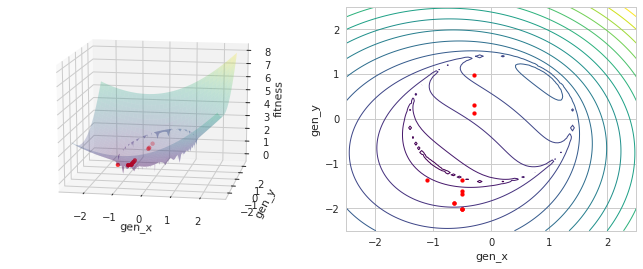

Generation 8


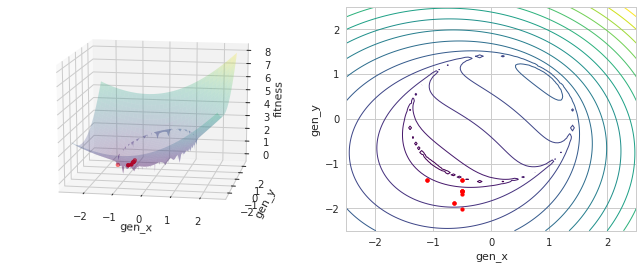

Generation 16


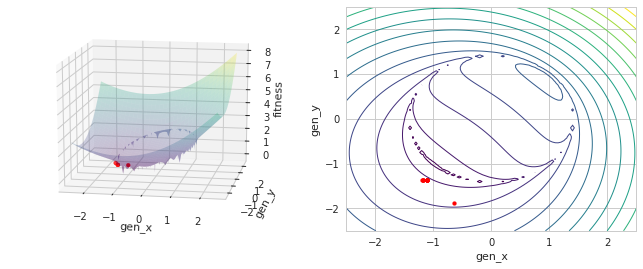

Generation 24


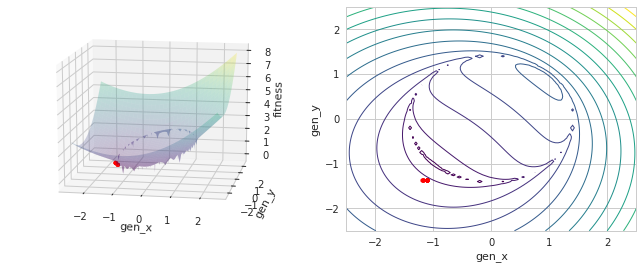

Generation 32


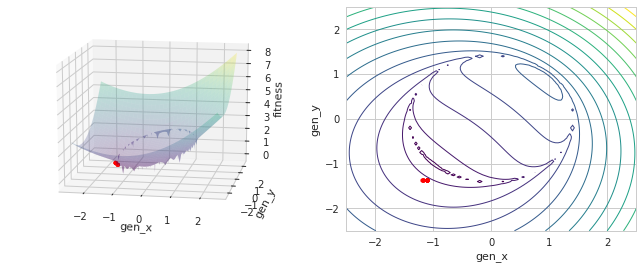

Generation 40


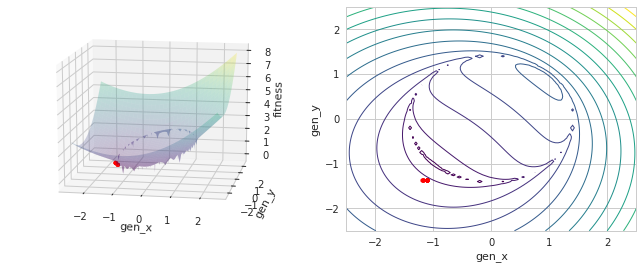

In [33]:
print('Generation 0')
EA_plt_pop(f, domain, steps, genera_res, run_s, 0, a=15, b=-80)
print('Generation 4')
EA_plt_pop(f, domain, steps, genera_res, run_s, 4, a=15, b=-80)
print('Generation 8')
EA_plt_pop(f, domain, steps, genera_res, run_s, 8, a=15, b=-80)
print('Generation 16')
EA_plt_pop(f, domain, steps, genera_res, run_s, 16, a=15, b=-80)
print('Generation 24')
EA_plt_pop(f, domain, steps, genera_res, run_s, 24, a=15, b=-80)
print('Generation 32')
EA_plt_pop(f, domain, steps, genera_res, run_s, 32, a=15, b=-80)
print('Generation 40')
EA_plt_pop(f, domain, steps, genera_res, run_s, 40, a=15, b=-80)